# Problem Set 3

In [1]:
#importing packages
import pandas as pd
import numpy as np

### Problem 3.1

Clean the data for any missing or erroneous values in order to include only the stocks that have complete data available on the above variables at the end of 2004. Create the corresponding variables.

__Read in the Excel data using the exact number of rows and columns separately to get the specified range.__

In [2]:
raw = pd.read_excel('lab3_data.xlsx')
raw.head(2)
raw.shape

(3983, 12)

In [3]:
#Removing all NAs while renaming the columns 
tmp = raw.dropna()
tmp.columns = ["name", "ticker", "exchange", "be", "clsgPrice", "size", "cP",
               "eP", "ebitdaP", "fcfP", "sP", "yr1Ret"]

tmp.head(2)

,name,ticker,exchange,be,clsgPrice,size,cP,eP,ebitdaP,fcfP,sP,yr1Ret
1,3D Systems Corporation,DDD,"NEW YORK STOCK EXCHANGE, INC.",5.306520e+07,9.94,2.665461e+08,-0.003288,-0.027163,-0.010686,-0.005725,0.481346,-0.094567
2,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989


### Problem 3.2

Since the existence of a single outlying value can markedly influence the results of correlation coefficients, remove any outliers present in the variables, which we have previously defined as data values that are 3 standard deviations away from their means.

__Create a function to identify the outliers. 

In [4]:
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

#creating subset of our variables
out = tmp.iloc[:,6:]
out.head()

#applying out is_out function
outA = out.apply(is_out)
outA.apply(sum, axis = 0)

#creating boolean index
outB = outA.any(axis = 1)
outB

#using boolean index
df = tmp[~outB]

print("Before and After Shapes")
print(tmp.shape)
print(df.shape)
df.reset_index(inplace = True, drop = True);  #just resets the index numbers
df.head(3)

Before and After Shapes
(1484, 12)
(1382, 12)


,name,ticker,exchange,be,clsgPrice,size,cP,eP,ebitdaP,fcfP,sP,yr1Ret
0,3D Systems Corporation,DDD,"NEW YORK STOCK EXCHANGE, INC.",5.306520e+07,9.94,2.665461e+08,-0.003288,-0.027163,-0.010686,-0.005725,0.481346,-0.094567
1,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,0.064421,0.043987,0.067516,0.051095,0.299432,-0.034989
2,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",4.644576e+08,23.95,2.704339e+09,0.187734,0.037996,0.051892,0.082927,4.161811,0.564509


### Problem 3.3

Regression models intended to explain the cross-section of average stock returns tend to make certain assumptions regarding the collected data in order to avoid distortion in the interpretation of the results. Given the difficulty in interpreting stocks with negative book values and negative earnings, we will exclude them from our data sets. However it is important to note that stocks with negative book values and earnings, behave like stocks with low book value of equity-to-market value of equity (BE/ME) and low earnings-to-price (E/P) ratios, which tend to have lower average returns. Also to avoid that the data sets are dominated by small cap stocks, we will exclude stocks with a closing price lower than 5 and with a market capitalization lower than 100m. Filter the data to avoid stocks with negative book values and earnings, with a closing price lower than 5, and with a market capitalization lower than 100m (any of these three).

__It is important to use parentheses when filtering values in this way. The & operator will take preference otherwise. Additionally, the notation for the columns is important. 

In [5]:
#Emphasis on parentheses and the df['col_name'] notation
df = df[(df['be'] > 0) & (df['eP'] > 0) & (df['clsgPrice'] > 5) & (df['size'] > 100000000)] 

In [6]:
df.shape

(1198, 12)

### Problem 3.4

Compute the correlation coefficients to quantify the direction and strength (if any) of linearassociation between each pair of the variables.

(a) Use the function sns.heatmap() or sns.pairplot() in the package seaborn to visualize the relationship between each pair of the variables.

<AxesSubplot:>

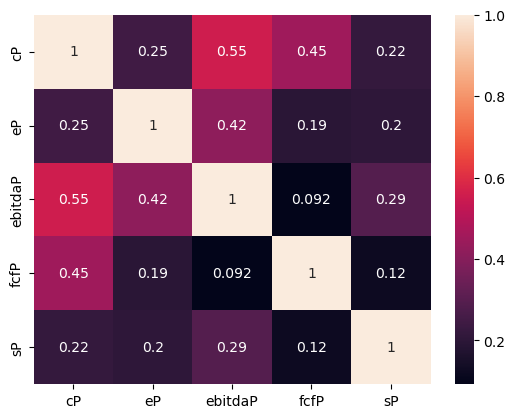

In [7]:
# (a)
import seaborn as sns #seaborn is a package that provides some useful correlation plots
import matplotlib.pyplot as plt
sns.load_dataset("iris")

sns.heatmap(df.iloc[:,6:11].corr(),annot = True)

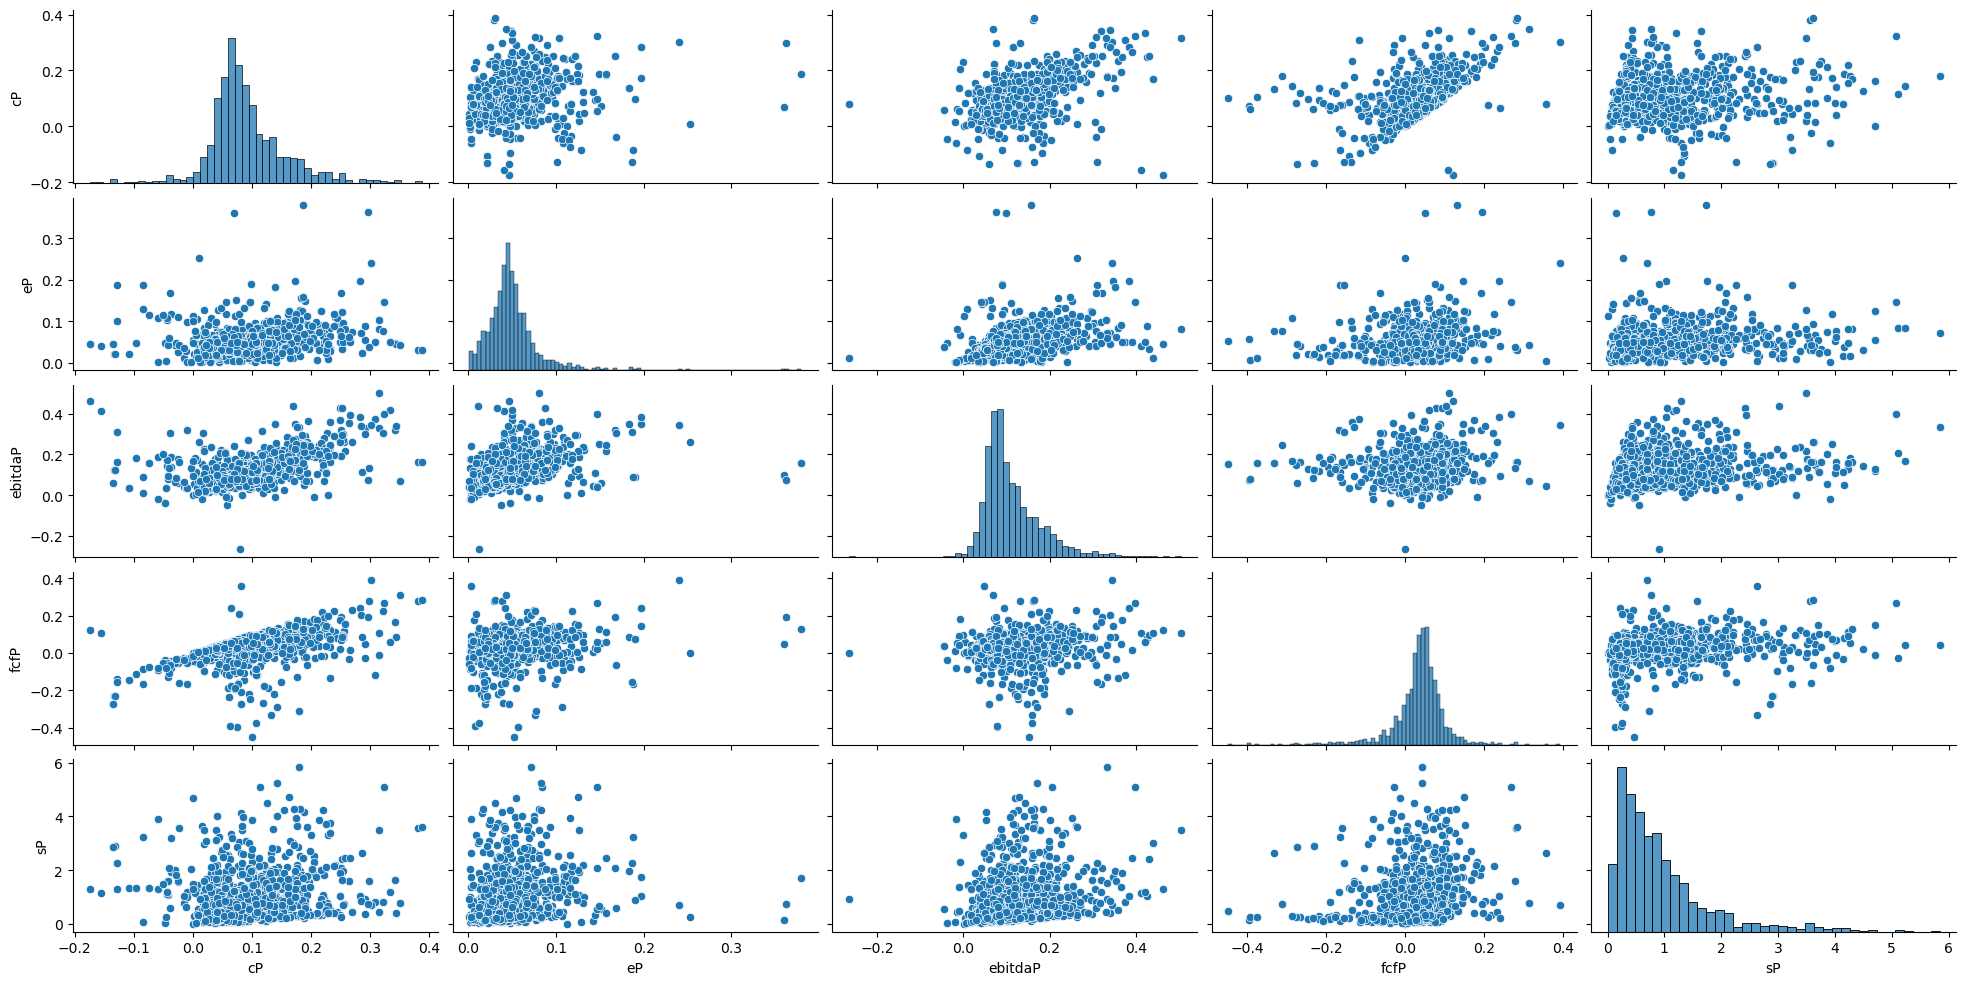

In [8]:
# (a)
sns.pairplot(df.iloc[:,6:11], kind="scatter", vars = df.iloc[:,6:11].columns, height = 2, aspect = 2)
plt.show()

The first element of the list is the matrix of the correlation coefficients. They tell us the direction and extent of association. The diagonal matrix elements represent the perfect correlation of each variable with itself and are equal to 1. The off-diagonal elements indicate statistical correlations between the variables. We can interpret these off-diagonal elements in the following way: a 0.1000 value can be interpreted as a low correlation, a 0.3000 value as a moderate correlation, and a 0.5000 as a high (or very) strong correlation between the pairs of variables. A correlation coefficient greater than 0.5000 could exist between two different measures of the same variable. Such large correlations might indicate a spurious (or artificial) relationship.

(b) Compute the correlation coefficients to quantify the direction and strength (if any) of linear associationbetween each pair of the variables.

In [9]:
# (b)
corr = df.iloc[:,6:11].corr()
corr

,cP,eP,ebitdaP,fcfP,sP
cP,1.000000,0.246719,0.554563,0.453753,0.219345
eP,0.246719,1.000000,0.415454,0.192984,0.203808
ebitdaP,0.554563,0.415454,1.000000,0.092254,0.294142
fcfP,0.453753,0.192984,0.092254,1.000000,0.124064
sP,0.219345,0.203808,0.294142,0.124064,1.000000


For this sample, there is a positive linear association between the pairs of variables. This may not be surprising since for instance, firms with high C/P ratios tend to have high E/P ratios. As the previous scatter plots showed, we can see that the correlations between cP and ebitdaP, and between cP and fcfP may represent some kind of artificial relationship. Also there is a moderate to large correlation between eP and ebitdaP. The matrix also shows some small correlations between ebitdaP and fcfP. The rest of the correlations appear to be between the [0.1000, 0.4000] range.

(c.) Create a matrix of p-values in order to test the hypothesis of no correlation between each pair of the variables against the alternative of significant correlation between each pair of the variables. Interpret the results. Create a matrix of p-values in order to test the hypothesis of no correlation between each pair of the variables against the alternative of significant correlation between each pair of the variables. Interpret the results. 

In [10]:
# (c)
def pval(df):
    #matrix of tstats
    r = df.corr()
    n = df.shape[0]
    t = r * np.sqrt(n - 2) / np.sqrt(1-r*r)
    
    #matrix of p-values
    import scipy.stats as stats
    p = (1-stats.t.cdf(abs(t), n-2))*2 #cumulative distribution function
    p = stats.t.sf(abs(t), n -2)*2
    p = pd.DataFrame(p)
    p.columns = df.columns
    p.index = df.columns
    return p

"""
One alternative and simpler way to calculate the p-value is using the pearsonr package with the .corr():

from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

p = data3.iloc[:, 6:11].corr(method=pearsonr_pval)
p.round(3)
"""

'\nOne alternative and simpler way to calculate the p-value is using the pearsonr package with the .corr():\n\nfrom scipy.stats import pearsonr\n\ndef pearsonr_pval(x,y):\n    return pearsonr(x,y)[1]\n\np = data3.iloc[:, 6:11].corr(method=pearsonr_pval)\np.round(3)\n'

In [11]:
p = pval(df.iloc[:, 6:11]).round(3)
p

C:\Users\pvile\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,cP,eP,ebitdaP,fcfP,sP
cP,NaN,0.0,0.000,0.000,0.0
eP,0.0,0.0,0.000,0.000,0.0
ebitdaP,0.0,0.0,NaN,0.001,0.0
fcfP,0.0,0.0,0.001,0.000,0.0
sP,0.0,0.0,0.000,0.000,0.0


In [12]:
p.apply(lambda x: x < 0.05)

,cP,eP,ebitdaP,fcfP,sP
cP,False,True,True,True,True
eP,True,True,True,True,True
ebitdaP,True,True,False,True,True
fcfP,True,True,True,True,True
sP,True,True,True,True,True


The function provided gives the significance of the correlation coefficients by calculating a matrix of p-values for purposes of testing the hypothesis of no correlation (i.e., the correlation between the variables is due to chance relationships in this particular data sample) against the alternative that there is a nonzero correlation. Each p-value is the probability of getting a correlation as large as the observed value by random chance, when the true correlation is zero. If p(i,j) is small, say less than 0.05, then the correlation r(i,j) is significantly different from zero. 

 This test tells us that there is a significant correlation between most of the pairs of variables in this sample. Therefore we may reject hypothesis of no correlation, which discards the possibility of spurious correlations between the variables due to chance relationships in this particular sample.

### Problem 3.5

The aim of this correlation analysis is to look for linear associations between the explained variable and each pair of the explanatory variables. Statistically significant correlation coefficients may provide valuable information about the behavior of returns. When there is no linear association between the variables, there is no reason to include them in a regression model as they will not provide useful information about the explained variable.

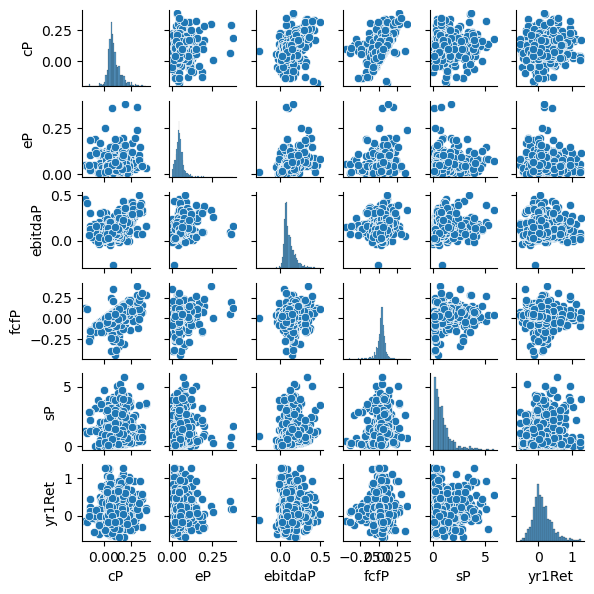

In [13]:
# (a)
sns.pairplot(df.iloc[:,6:], kind="scatter", vars = df.iloc[:,6:].columns, height = 1, aspect = 1)
#plt.show()

Again, in the lower triangular, this function creates the scatter plot in the (i, j)th position of the array. In addition, the plot in the ith diagonal position is a histogram of the ith variable. The upper triangular features the correlation between two variables and its significance level. The resulting plot matrix gives us an idea of how the explanatory variables fluctuate against the explained variable.

From the scatter plots and the correlations we can see that there may be some positive relationships between the explained variables and the explanatory variables. In particular, cP and ebitdaP seem to reveal strong predictability.

In [14]:
# (b)
corr1 = df.iloc[:,6:].corr()
corr1

,cP,eP,ebitdaP,fcfP,sP,yr1Ret
cP,1.000000,0.246719,0.554563,0.453753,0.219345,0.080770
eP,0.246719,1.000000,0.415454,0.192984,0.203808,0.012090
ebitdaP,0.554563,0.415454,1.000000,0.092254,0.294142,0.083011
fcfP,0.453753,0.192984,0.092254,1.000000,0.124064,-0.011101
sP,0.219345,0.203808,0.294142,0.124064,1.000000,0.050011
yr1Ret,0.080770,0.012090,0.083011,-0.011101,0.050011,1.000000


The correlation matrix between the explained variable and each pair of the explanatory variables is computed using the function corr.test. In this case the correlations are shown in the last row and column of the matrix.

With a positive (negative) correlation coefficient between the explained variable and the explanatory variable, we can expect a positive (negative) regression coefficient for the explanatory variable in a regression on the explained variable.

In [15]:
p = pval(df.iloc[:, 6:]) #not above the diagonal will not match R code because R code does multiples testing
p

C:\Users\pvile\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,cP,eP,ebitdaP,fcfP,sP,yr1Ret
cP,NaN,4.520880e-18,1.493631e-97,6.804847e-62,1.619166e-14,0.005154
eP,4.520880e-18,0.000000e+00,3.436464e-51,1.627693e-11,1.065672e-12,0.675913
ebitdaP,1.493631e-97,3.436464e-51,NaN,1.390630e-03,2.448515e-25,0.004039
fcfP,6.804847e-62,1.627693e-11,1.390630e-03,0.000000e+00,1.660280e-05,0.701088
sP,1.619166e-14,1.065672e-12,2.448515e-25,1.660280e-05,0.000000e+00,0.083580
yr1Ret,5.153683e-03,6.759131e-01,4.038528e-03,7.010883e-01,8.358040e-02,NaN


In [16]:
p.apply(lambda x: x < 0.05)

,cP,eP,ebitdaP,fcfP,sP,yr1Ret
cP,False,True,True,True,True,True
eP,True,True,True,True,True,False
ebitdaP,True,True,False,True,True,True
fcfP,True,True,True,True,True,False
sP,True,True,True,True,True,False
yr1Ret,True,False,True,False,False,False


We can assess the significance of the relationships to confirm our prior assessment by calculating the matrix of the p-values for the correlation coefficients. In large samples, even relatively small correlations can be significantly different from zero. The test showing the significance of the correlations coincides with our assessment that only cP and ebitdaP have significant correlations with the explained variable yr1Ret.

### Problem 3.6

Compute the z-scores for each of the explanatory variables and compute the correlation coefficients between each pair of the explanatory variables. Do these results change your answers in problems 3.4?

In [17]:
from scipy import stats #scipy.stats has a zscore function
df.iloc[:,6:11] = stats.zscore(df.iloc[:,6:11])
df.head()

,name,ticker,exchange,be,clsgPrice,size,cP,eP,ebitdaP,fcfP,sP,yr1Ret
1,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,-0.414969,-0.199004,-0.651158,0.234212,-0.748418,-0.034989
2,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",4.644576e+08,23.95,2.704339e+09,1.517557,-0.385390,-0.870733,0.685248,3.789049,0.564509
3,99 Cents Only Stores,NDN,"NEW YORK STOCK EXCHANGE, INC.",4.882846e+08,16.16,1.123212e+09,-0.256329,-0.720396,-0.596153,-0.358950,-0.133924,-0.352723
4,A.M. Castle & Co.,CAS,"NEW YORK STOCK EXCHANGE, INC.",1.190104e+08,11.94,1.886095e+08,-0.123394,-0.290729,0.894891,0.229849,3.029229,0.829145
5,A.O. Smith Corporation,AOS,"NEW YORK STOCK EXCHANGE, INC.",5.905990e+08,19.96,8.828575e+08,-0.981525,-0.039986,-0.389300,-0.822220,1.016506,0.198806


In [18]:
df.iloc[:,6:11].corr()

,cP,eP,ebitdaP,fcfP,sP
cP,1.000000,0.246719,0.554563,0.453753,0.219345
eP,0.246719,1.000000,0.415454,0.192984,0.203808
ebitdaP,0.554563,0.415454,1.000000,0.092254,0.294142
fcfP,0.453753,0.192984,0.092254,1.000000,0.124064
sP,0.219345,0.203808,0.294142,0.124064,1.000000


In [19]:
corr

,cP,eP,ebitdaP,fcfP,sP
cP,1.000000,0.246719,0.554563,0.453753,0.219345
eP,0.246719,1.000000,0.415454,0.192984,0.203808
ebitdaP,0.554563,0.415454,1.000000,0.092254,0.294142
fcfP,0.453753,0.192984,0.092254,1.000000,0.124064
sP,0.219345,0.203808,0.294142,0.124064,1.000000


The aggregate z-score is an equal weighted average (or mean) of the single factor z-scores. When we compute the correlation coefficient with the aggregate z-score we must understand that correlations computed from aggregated data, where the values are averaged across stocks, would be larger than what they would be if the individual variables were used. This is due to increased reliability and therefore we should never interpret aggregated correlation as if it were correlations from individual variables.

In [24]:
#aggregated z_score
df['zAggr'] = df[['cP', 'eP', 'ebitdaP', 'fcfP', 'sP']].mean(axis = 1)
df.head(3)

,name,ticker,exchange,be,clsgPrice,size,cP,eP,ebitdaP,fcfP,sP,yr1Ret,zAggr
1,3M Co,MMM,"NEW YORK STOCK EXCHANGE, INC.",1.037801e+10,82.07,6.389427e+10,-0.414969,-0.199004,-0.651158,0.234212,-0.748418,-0.034989,-0.355867
2,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",4.644576e+08,23.95,2.704339e+09,1.517557,-0.385390,-0.870733,0.685248,3.789049,0.564509,0.947146
3,99 Cents Only Stores,NDN,"NEW YORK STOCK EXCHANGE, INC.",4.882846e+08,16.16,1.123212e+09,-0.256329,-0.720396,-0.596153,-0.358950,-0.133924,-0.352723,-0.413151


In [28]:
corr_aggzscore = df[['yr1Ret', 'zAggr']].corr()
corr_aggzscore

,yr1Ret,zAggr
yr1Ret,1.000000,0.065988
zAggr,0.065988,1.000000


### Problem 3.7

Computing confidence intervals, not sure if I go through with trying to make pairwise for each section. It would require a semi complicated function. 

Create a function to return CIs in a pairwise fashion

Confidence Interval = x  +/-  t*(s/√n)
    x = mean
    t = tstat
    s = sample standard deviation
    n = number of observations

Multicollinearity arises when two or more explanatory variables (or combinations of explanatory variables) are highly (but not perfectly) correlated with each other. Coefficient estimates for multiple linear regression models rely on the independence of the model variables. When the explanatory variables are correlated and they have an approximate linear dependence, the matrix inverse needed to calculate the least-squares estimates becomes highly sensitive to random errors in the observed explained variable, thereby producing a large variance. Consequently with multicollinearity we can estimate the regression, but the interpretation of the regression estimates becomes problematic. Moreover, tests of regressions with highly correlated predictors lack explanatory power in order to separate the effects of one predictor from the effects of the other in the explained variable. Some symptoms of multicollinearity may include slope coefficients with high standard errors and low significance levels for the t-statistics or high multiple R2 (and significant F-statistic) levels, but coefficients with wrong signs or implausible magnitudes.

Using the correlation coefficients in problem 3.4, we identified the explanatory variables with high correlations with each other’s. Given the significance tests, we concluded that there were significant correlations between each pair of the explanatory variables. However, not all of those variables had high correlations with each other’s.

__NOTE: IF WE HAD CALCULATED CONFIDENCE INTERVALS WHICH WE DID NOT TO SIMPLIFY THE CODE; THIS IS FOR REFERENCE TO UNDERSTAND THE PROCESS A BIT FURTHER__

For instance, the confidence bounds tell us that we could keep cP, eP, and sP since their 95% confidence intervals for their correlation coefficients lie between [0.1489, 0.2992], (i.e., [0.1928, 0.2992] for cP and eP, [0.1648, 0.2726] for cP and sP, and [0.1489, 0.2575] for eP and sP). However we suspect the correlations between each pair of cP, eP, and sP are due to spurious relations between them. These spurious relationships are induced in part from (i) the direct relationship between them, as they are derived from the others, which will cause a greater proportion of shared variance; and in part from (ii) their relation to third component, which in this case is price, as they are all scaled versions of price. Spurious relationships of this sort result in larger correlations than should be. Consequently the most direct solution to correct for multicollinearity is to exclude one or more of the variables and in this case, leave only the one with the highest correlation together with the explained variable.

### Problem 3.8

In [30]:
import statsmodels.api as sm

print(sm.OLS(endog = df["yr1Ret"], exog = sm.add_constant(df[['cP', 'eP', 'ebitdaP', 'fcfP', 'sP']])).fit().summary()) #check; do not like the fact numbers are different

                            OLS Regression Results                            
Dep. Variable:                 yr1Ret   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.843
Date:                Thu, 16 Feb 2023   Prob (F-statistic):             0.0147
Time:                        10:11:26   Log-Likelihood:                -165.85
No. Observations:                1198   AIC:                             343.7
Df Residuals:                    1192   BIC:                             374.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1180      0.008     14.664      0.0

Overfitting is the use of models that include more explanatory variables than are necessary, i.e., models that include irrelevant as well as the needed predictors. Adding irrelevant predictors can make predictions worse because the regression coefficients fitted to them add random variation to the subsequent predictions. Given the results in problems 3.5 and 3.7, if we were to fit a model that incorporates the 5 explanatory variables we would definitely run the risk of overfitting the regression model. First, as we saw in problem 3.5, when the correlation coefficients are interpreted, as the approximate proportion of variation explained, only 2 predictors (cP and ebitdaP) showed statistically significant levels. Therefore, the other 3 predictors (cP, eP, and sP) will just add noise to the regression, which will decrease the adjusted R2 measure. However as we discussed in problem 3.7, the confidence interval for the correlation between cP and ebitdaP is [0.5141, 0.5926], which means that including both variables in a model would make it prone to multicollinearity since both variables will compete for explanatory power.

Therefore we can compute the lower and upper bounds for a 95% confidence interval of the coefficients between these two variables and the explained variable, in order to assess which one to include in the regression model.

Since the confidence intervals of the correlation coefficients are similar for both variables, we can conduct a test of significance specifying a higher confidence level of 99.5% to decide which of the variables to include. ebitdaP is the final variable we are going to pick. The regression result is also included, and we will do more about regressions in lab 4.